# Using Advertising data set we are performing Linear Regression

Importing all the necessary libraries for Linear Regression operations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

Reading the data set

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# EDA

Understanding the shape of the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Checkinng for null values in the data set

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Dropping 1st Column as it is Serial Numberm

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Using descibe method to understand the features of the data set

In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualising Data

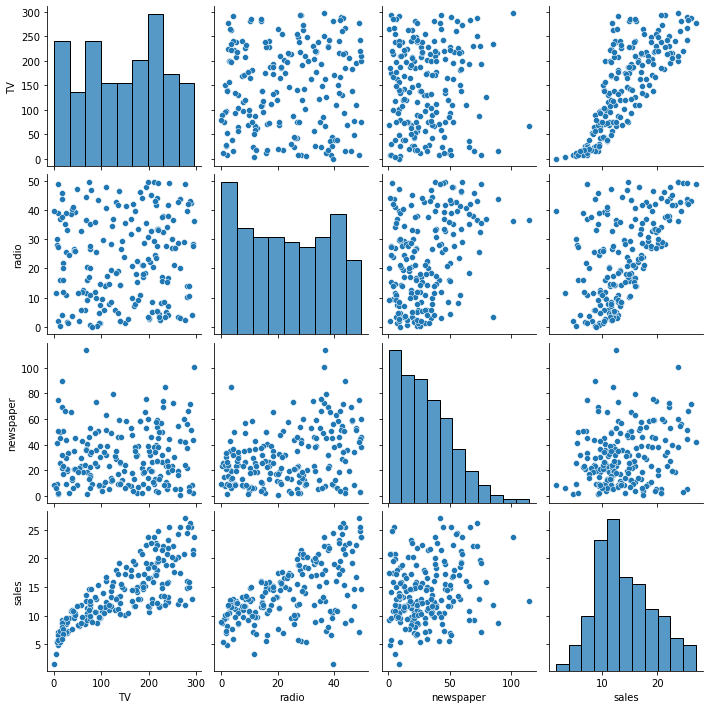

In [8]:
sns.pairplot(df)

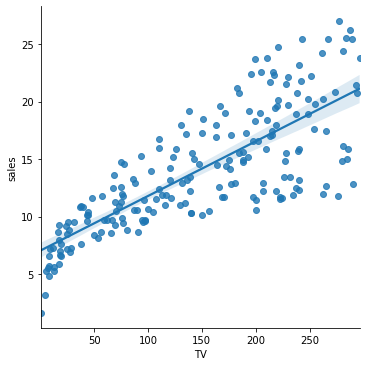

In [9]:
sns.lmplot('TV','sales',data=df)

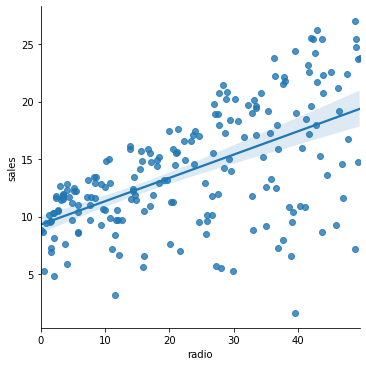

In [10]:
sns.lmplot('radio','sales',data=df)

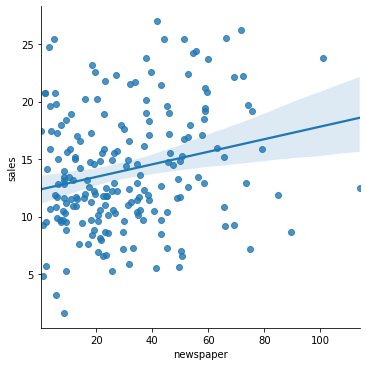

In [11]:
sns.lmplot('newspaper','sales',data=df)

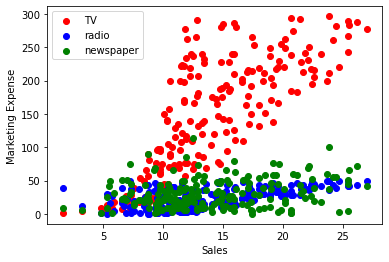

In [12]:
plt.scatter('sales','TV', data = df, color='red')
plt.scatter('sales','radio', data = df, color='blue')
plt.scatter('sales','newspaper', data = df, color='green')
plt.xlabel('Sales')
plt.ylabel('Marketing Expense')
plt.legend()
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

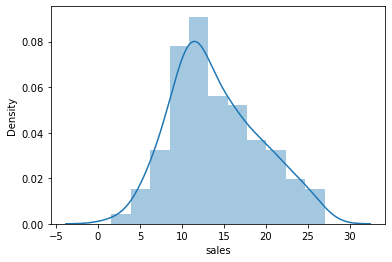

In [13]:
sns.distplot(df['sales'])

<AxesSubplot:>

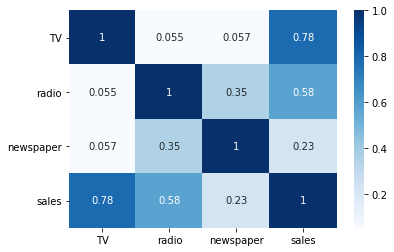

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='Blues') 

Making training and testing sets for Regression Model

In [15]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state=1)

Making and training Regression model

In [17]:
linreg = LinearRegression()

linreg.fit(xtrain,ytrain)

ypred = linreg.predict(xtest)

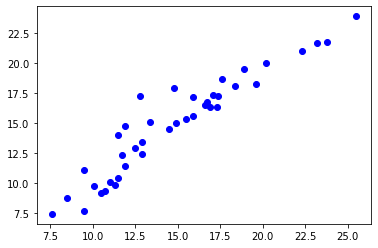

In [18]:
plt.scatter(ytest,ypred,color='blue')
plt.show()

In [19]:
linreg.coef_

array([0.0468431 , 0.17854434, 0.00258619])

In [20]:
linreg.intercept_

2.9079470208164295

In [21]:
coef_df = pd.DataFrame(linreg.coef_,x.columns,columns = ['coefficient'])
coef_df

,coefficient
TV,0.046843
radio,0.178544
newspaper,0.002586


 - If we keep all the features constant and increase a unit in TV column, the sales will increase by 0.046843
 - If we keep all the features constant and increase a unit in radio column, the sales will increase by 0.178544
 - If we keep all the features constant and increase a unit in newspaper column, the sales will increase by 0.002586

Plotting residuals distplot

<AxesSubplot:xlabel='sales', ylabel='Density'>

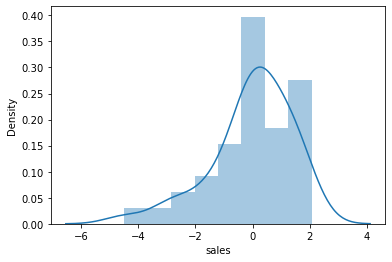

In [22]:
resid = ytest-ypred

sns.distplot(resid)

The errors and r2 score for the regression model created

In [23]:
mae = mean_absolute_error(ytest,ypred)
mse = mean_squared_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,ypred)

print(f'MAE            : {mae}')
print(f'MSE            : {mse}')
print(f'RMSE           : {rmse}')
print(f'R2 Score       : {r2}')

MAE            : 1.0402154012924711
MSE            : 1.9918855518287877
RMSE           : 1.4113417558581578
R2 Score       : 0.8927605914615385


In [26]:
train = linreg.score(xtrain,ytrain)

print(f'Training Result : {train}')
print(f'Testing Result : {r2}')

Training Result : 0.8959372632325174
Testing Result : 0.8927605914615385


## Conclusion

- We conclude that the company should spend more in Radio marketing.
- The sales achieved by newspaper marketing is very low.